# Trực Quan Hóa Phổ Điểm Của Hà Giang So Với Cả Nước Ở Kỳ Thi THPT Quốc Gia 2018 {-}

Môn: Trực quan hóa dữ liệu

Họ và tên: Nguyễn Hữu Huân

MSSV: 1712466

## 1. Thông tin chung về bài toán: {-}

Kỳ thi THPT Quốc gia Việt Nam 2018 đã diễn ra với sự tham gia của [hơn 920,000 thí sinh](https://tuoitre.vn/hon-925-000-thi-sinh-du-ky-thi-thpt-quoc-gia-2018-20180623192739292.htm) toàn quốc. Đây là năm thứ 4 (kể từ năm 2015) thực hiện hình thức thi 2 trong 1 ở địa phương: lấy kết quả xét tốt nghiệp - đại học và là năm thứ 2 (kề từ năm 2017) áp dụng hình thức trắc nghiệm cho (gần như) toàn bộ các môn: Toán, Ngoại ngữ, tổ hợp Khoa học tự nhiên: Lý, Hóa, Sinh và tổ hợp Khoa học xã hội: Sử, Địa, Giáo dục công dân (Chỉ riêng môn Ngữ Văn vẫn áp dụng hình thức tự luận). 

Bên cạnh những lợi ích trước mắt mà hình thức trắc nghiệm mang lại, nó cũng dấy lên sự lo ngại về nhiều vấn đề trong đó có việc dễ dàng gian lận (trong cả quá trình thi lẫn quá trình chấm thi) nếu không có sự kiểm soát chặt chẽ, nghiêm túc. Vụ bê bối gian lận về điểm thi ở các tỉnh Hà Giang, Hòa Bình, Sơn La trong kì thi THPT Quốc gia Việt Nam năm 2018 đã xảy ra như một minh chứng đáng xấu hổ cho những lo ngại ấy.

Vụ gian lận này bị phát hiện sớm nhờ sự góp phần rất lớn qua việc phân tích dữ liệu điểm thi "bất thường" của các tỉnh gian lận. Ở homework này, em sẽ áp dụng những kiến thức được học ở môn Trực Quan Hóa Dữ Liệu để trực quan, phân tích những sự "bất thường" trong phổ điểm THPT Quốc gia 2018 của tỉnh Hà Giang (tiêu biểu) bằng Python và các thư viện hỗ trợ.   


## 1. Dữ liệu và các thư viện cần thiết {-}

Các thư viện sẽ được sử dụng:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
sns.set(color_codes=True)

Dữ liệu mà em sử dụng lấy nguồn từ một [Github repository](https://github.com/dnanhkhoa/nhse-dataset). Dữ liệu này đã được lọc sạch và chia theo các file csv theo từng tỉnh. Do đó, em sẽ "gộp" các file csv này lại thành file chứa dữ liệu cả nước.  

In [3]:
import glob
interesting_files = glob.glob("../input/all/*.csv")
df_list = []
for filename in sorted(interesting_files):
    df_list.append(pd.read_csv(filename))
full_df = pd.concat(df_list)

full_df.to_csv('../input/vietnam.csv',index=None)

Sau khi đã có các file csv cho dữ liệu điểm của Hà Giang và cả nước. Em load nó vào 2 dataframe `vietnam_df` và `hagiang_df`

In [4]:
vietnam_df = pd.read_csv("../input/vietnam.csv")

In [5]:
hagiang_df = pd.read_csv("../input/hagiang.csv")

In [6]:
len(vietnam_df)

844122

In [7]:
len(hagiang_df)

3099

Dữ liệu mà em đang nắm ở đây có điểm của 844121 thí sinh trong đó Hà Giang có 3098 (chiếm khoảng $0.37\%$ số thí sinh cả nước)

## 2. Trực quan hóa dữ liệu và phân tích sự kỳ lạ của phổ điểm Hà Giang {-}

### 2.1 Toàn quốc {-}

Dựng biểu đồ histogram (chưa chuẩn hóa) để thấy mức phân bố điểm và số lượng thí sinh đạt được các mức điểm.

Ở các môn trên cả nước:

In [8]:
subs = ["TOÁN", "VĂN", "LÝ", "HÓA", "SINH", "SỬ", "ĐỊA", "GDCD", "ANH"]

Số lượng điểm theo các khoảng ở môn TOÁN:  [   997.  11111.  72232. 139608. 189422. 210351. 152016.  54685.   9386.
    456.]
Số lượng điểm theo các khoảng ở môn VĂN:  [   505.   6423.  32917.  88346. 140482. 220572. 196370. 106138.  32289.
   2019.]
Số lượng điểm theo các khoảng ở môn LÝ:  [  376.  4495. 28850. 61154. 81578. 81490. 60423. 33766.  9287.   489.]
Số lượng điểm theo các khoảng ở môn HÓA:  [  507.  4802. 32148. 66448. 82458. 82394. 60374. 27605.  8068.  1023.]
Số lượng điểm theo các khoảng ở môn SINH:  [   336.   2016.  24657.  83163. 115693.  81375.  34381.  12479.   3178.
    266.]
Số lượng điểm theo các khoảng ở môn SỬ:  [   606.  12777. 104053. 183126. 125498.  54161.  20245.   8419.   3254.
    572.]
Số lượng điểm theo các khoảng ở môn ĐỊA:  [   452.   1020.   8556.  37762. 107577. 159864. 117437.  49122.  13659.
   2074.]
Số lượng điểm theo các khoảng ở môn GDCD:  [   219.    145.    924.   4080.  14677.  44070.  99466. 142609. 102377.
  25454.]
Số lượng điểm theo cá

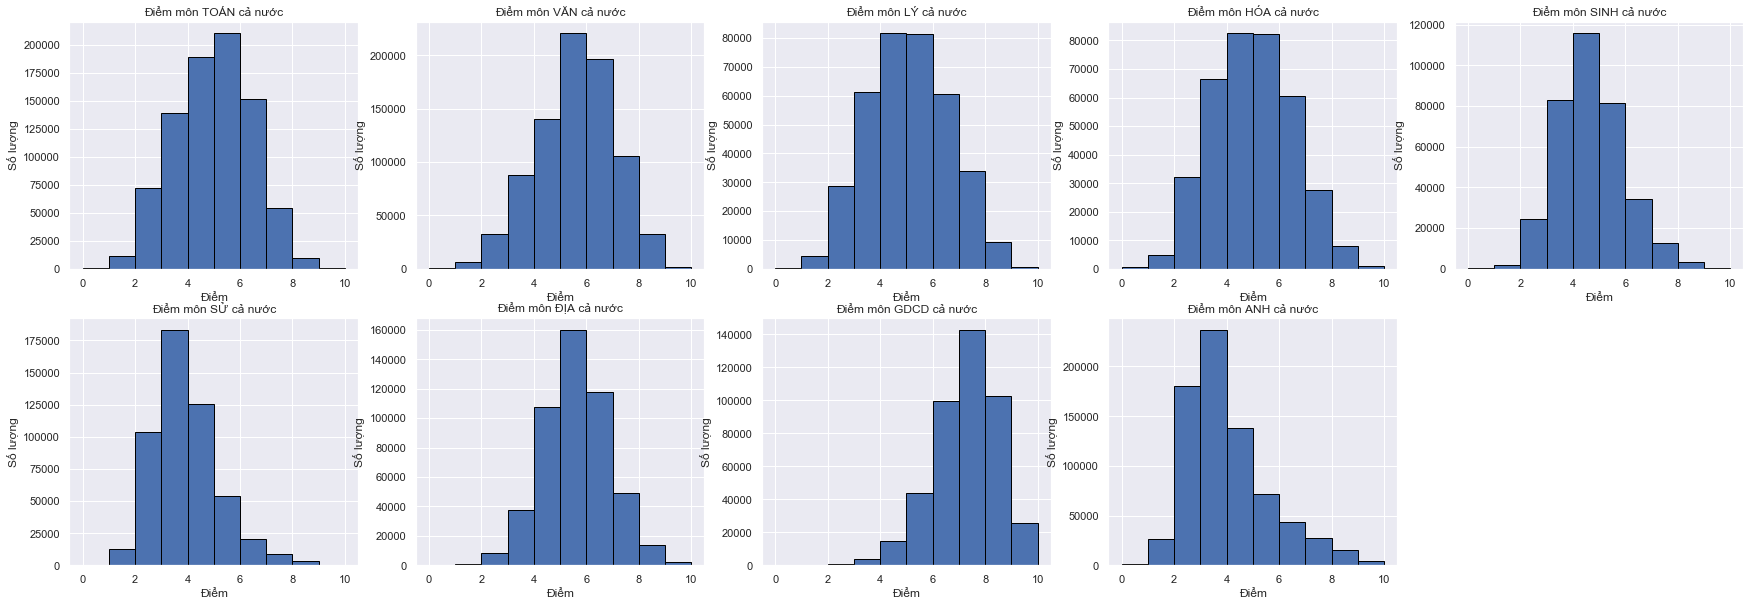

In [9]:
fig_1 = plt.figure(figsize=(30,10))
for i, sub in enumerate(subs):
    ax = fig_1.add_subplot(2,5,i+1)
    ax.set_title(f"Điểm môn {sub} cả nước")
    vn_hist = ax.hist(vietnam_df[sub], bins=range(11),edgecolor='black', density=False)
    ax.set_xlabel("Điểm")
    ax.set_ylabel("Số lượng")
    print(f"Số lượng điểm theo các khoảng ở môn {sub}: ",vn_hist[0])
plt.show()

Nhìn sơ qua dựa trên số liệu thì có thể dễ dàng nhận ra nhìn chung điểm thi năm 2018 hầu hết phân bố khá chuẩn (trừ môn Sử và Tiếng Anh bị lệch trái và GDCD lệch phải), và để đạt tới mức "vận dụng cao" (tức từ 9-10) là **rất khó**. 

Biểu hiện qua số lượng thí sinh đạt được ngưỡng điểm từ 9 - 10 là cực kỳ ít: 
- Toán: khoảng 500 thí sinh (chiếm $\approx 0.05 \%$ số thí sinh dự thi môn này)
- Lý: khoảng 500 (chiếm $\approx 0.1\%$ số thí sinh dự thi môn này)
- Sử: khoảng 500 (chiếm $\approx 0.1\%$ số thí sinh dự thi môn này)
- Sinh: khoảng 270 (chiếm $\approx 0.07\%$ số thí sinh dự thi môn này)
- Hóa: khoảng 1000 (chiếm $\approx 0.3\%$ số thí sinh dự thi môn này)
- Tiếng Anh: khoảng 4000 (chiếm $\approx 0.6\%$ số thí sinh dự thi môn này)
- GDCD: khoảng 25000(chiếm $\approx 6\%$ số thí sinh dự thi môn này)
- Địa: khoảng 2000 ( chiếm $\approx 0.4\%$ số thí sinh dự thi môn này)

### 2.2 Hà Giang: {-}

Bây giờ, em sẽ vẽ đồ thị phân bố điểm (đã chuẩn hóa theo xác suất) của tỉnh Hà Giang ở các môn. Để trực quan hơn, em sẽ vẽ chồng lên phổ điểm (đã chuẩn hóa xác suất) của toàn quốc để so sánh.

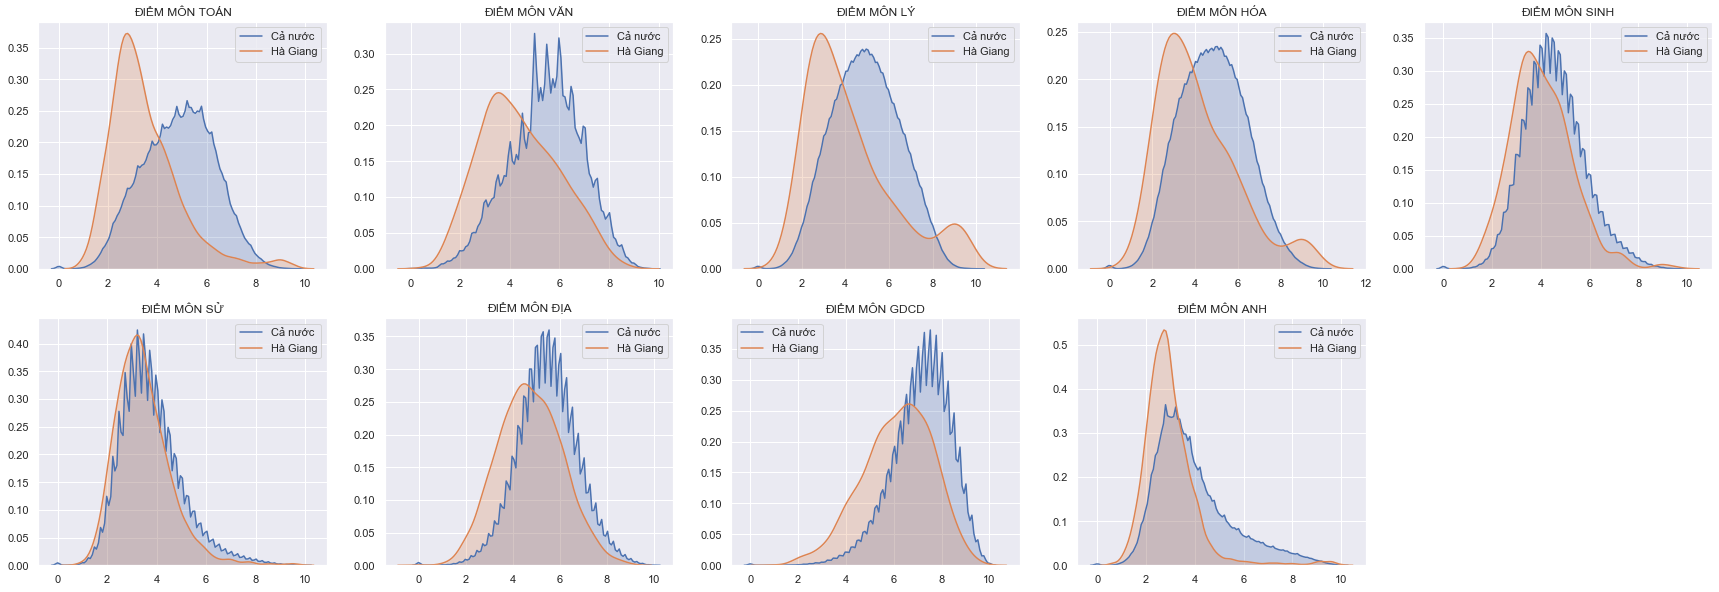

In [10]:
fig_2 = plt.figure(figsize=(30,10))
for i, sub in enumerate(subs):
    ax = fig_2.add_subplot(2,5,i+1)
    ax.set_title(f"ĐIỂM MÔN {sub}")
    ax = sns.kdeplot(vietnam_df[sub],shade=True, label="Cả nước")
    ax = sns.kdeplot(hagiang_df[sub],shade=True, label="Hà Giang")

Rõ ràng là phổ điểm của Hà Giang **rất kỳ quặc**. Với kỳ vọng (theo cảm tính) thông thường về một Hà Giang chưa từng nổi tiếng về truyền thống thi cử (so với các địa phương có truyền thống về số lượng thí sinh và kết quả cao như TP HCM, Hà Nội, Thanh Hóa,..), thì phổ điểm của Hà Giang đáng lẽ sẽ "đâu đó xung quanh" phân bố của cả nước hoặc có "lệch trái" thì cũng không có gì bất ngờ.

Tuy nhiên, nhìn vào các biểu đổ ở từng môn, dễ dàng thấy có những khoảng "nhô" bất thường trong khoảng điểm "vận dụng cao" ở các môn như: Toán, Lý, Hóa, Sinh, Tiếng Anh. "Nhô" ở đây thể hiện số lượng thí sinh đạt điểm 9-10 nhiều hơn số lượng thí sinh đạt 8-9. Điều này hoàn toàn đi ngược với quy luật điểm càng cao, càng ít người đạt được. Càng bất thường hơn khi tất cả các phân bố điểm của Hà Giang đều nhìn chung lệch trái so với cả nước (tức điểm trung bình thấp hơn cả nước). 

Phân tích kỹ các môn nghi ngờ để thấy Hà Giang "vượt kỳ vọng" tới đâu?

Số lượng điểm theo các khoảng ở môn TOÁN:  [0.         0.08060861 0.31628359 0.29232761 0.1764325  0.07219165
 0.02913564 0.0132729  0.01003561 0.00971188]
Số lượng điểm theo các khoảng ở môn LÝ:  [0.         0.05723906 0.25084175 0.23905724 0.16835017 0.0959596
 0.06228956 0.03535354 0.03535354 0.05555556]
Số lượng điểm theo các khoảng ở môn HÓA:  [0.00169205 0.04399323 0.24196277 0.24534687 0.16582064 0.13536379
 0.08460237 0.02707276 0.01692047 0.03722504]
Số lượng điểm theo các khoảng ở môn SINH:  [0.         0.0245614  0.14385965 0.32105263 0.2877193  0.14736842
 0.04736842 0.02105263 0.00175439 0.00526316]
Số lượng điểm theo các khoảng ở môn ANH:  [0.00207684 0.09380408 0.45794393 0.31983385 0.09034268 0.0145379
 0.00588439 0.00449983 0.00276912 0.00830737]


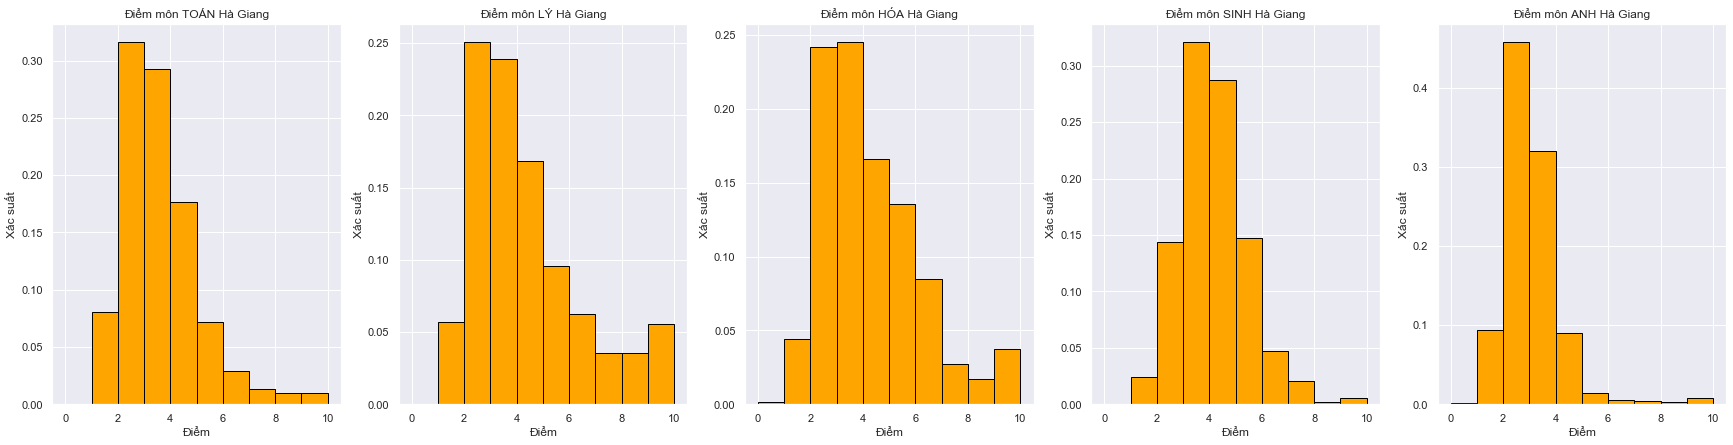

In [11]:
fig_2 = plt.figure(figsize=(30,7))
subjs = ['TOÁN', 'LÝ', 'HÓA', 'SINH', 'ANH']
for i, sub in enumerate(subjs):
    ax = fig_2.add_subplot(1,5,i+1)
    ax.set_title(f"Điểm môn {sub} Hà Giang")
    hg_hist = ax.hist(hagiang_df[sub], bins=range(11),edgecolor='black', density=True, color = 'orange')
    ax.set_xlabel("Điểm")
    ax.set_ylabel("Xác suất")
    print(f"Số lượng điểm theo các khoảng ở môn {sub}: ",hg_hist[0])
plt.show()

Hà Giang có số thi sinh đạt 9-10 ở môn Vật Lý cao hơn $0.05 / 0.001 = 50$ lần so với kỳ vọng! Ở môn Toán cao hơn 20 lần so với kỳ vọng! Con số này ở các môn Hóa, Sinh lần lượt là: 12, 8.

Hàng loạt các con số ấn tượng đến khó tin xuất hiện. 

Bây giờ em sẽ trực quan các cặp điểm toán-lý, toán-hóa, lý-hóa, toán-anh để dễ nhận dạng các "outlier" đi ra khỏi xu hướng.

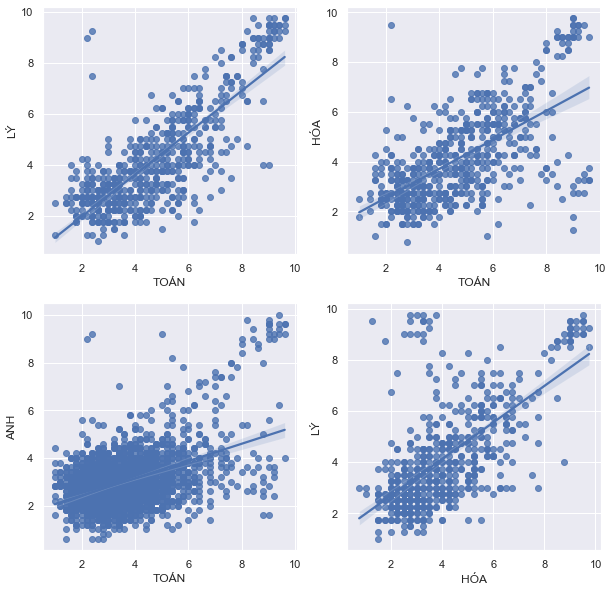

In [12]:
fig_3 = plt.figure(figsize=(10,10))
ax1 = fig_3.add_subplot(2,2,1)
ax1 = sns.regplot(x="TOÁN", y="LÝ", data=hagiang_df)

ax2 = fig_3.add_subplot(2,2,2)
ax2 = sns.regplot(x="TOÁN", y="HÓA", data=hagiang_df)

ax3 = fig_3.add_subplot(2,2,3)
ax3 = sns.regplot(x="TOÁN", y="ANH", data=hagiang_df)

ax4 = fig_3.add_subplot(2,2,4)
ax4 = sns.regplot(x="HÓA", y="LÝ", data=hagiang_df)


Nhìn vào hình cũng dễ thấy, trong khi phần lớn các điểm trập trung ở góc trái phía dưới, lại xuất hiện các điểm "outliers" tách ra quá xa các điểm đa số. Và các điểm ở trên cao góc phải, không theo đường xu hướng cũng là những điểm "outliers".

Tiếp theo, em sẽ kiểm tra xem số lượng thí sinh đạt điểm >27 ở Hà Giang và toàn quốc để trả lời câu hỏi: liệu những con điểm "cao vọt" ở các môn ấy có phải là thuộc chung một nhóm thí sinh ở Hà Giang hay không.

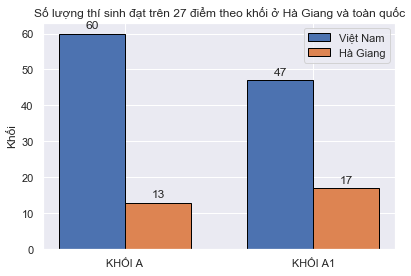

In [13]:
combos = ["KHỐI A", "KHỐI A1"]
vn = [len(vietnam_df[vietnam_df[combo] > 27]) for combo in combos]
hg = [len(hagiang_df[hagiang_df[combo] > 27]) for combo in combos]


x = np.arange(len(combos))  # the xticks locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, vn, width, label='Việt Nam',edgecolor='black')
rects2 = ax.bar(x + width/2, hg, width, label='Hà Giang', edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Khối')
ax.set_title('Số lượng thí sinh đạt trên 27 điểm theo khối ở Hà Giang và toàn quốc')
ax.set_xticks(x)
ax.set_xticklabels(combos)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Quả đúng như dự đoán, những con điểm "cao chót vót" ở các môn tập trung vào một nhóm thí sinh thi khối A, A1. Số lượng thí sinh đạt được điểm > 27 ở khối A (Toán-Lý-Hóa) và A1 (Toán-Lý-Tiếng Anh) là rất nhiều so với mặt bằng cả nước. 

Rõ ràng với mức độ cực khó để đạt điểm trên 9 của đề thi THPTQG 2018, để đạt được điểm gần như hoàn hảo ở cả 3 môn trong khối đòi hỏi không những trình độ của thí sinh phải cực kỳ xuất chúng mà khả năng giữ phong phộ, sức lực phải cực kỳ hoàn hảo. Nhất là khi những môn này thi liên tiếp nhau trong cùng một buổi.   

Dùng đồ thị dạng stacked bar để thấy rõ tỷ lệ điểm cao của Hà Giang so với cả nước.

In [14]:
vn_wo_hg_df = vietnam_df[~vietnam_df['SBD'].isin(hagiang_df['SBD'])]  # Vietnam without Hagiang

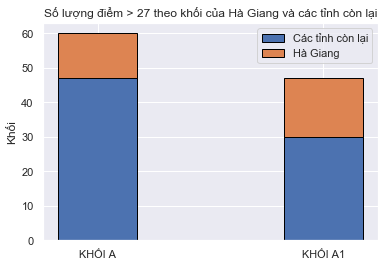

In [15]:
vn_wo_hg = [len(vn_wo_hg_df[vn_wo_hg_df[combo] > 27]) for combo in combos]
fig, ax = plt.subplots()

ax.bar(combos, vn_wo_hg, width, label='Các tỉnh còn lại',edgecolor='black')
ax.bar(combos, hg, width,  bottom=vn_wo_hg, label='Hà Giang',edgecolor='black')

ax.set_ylabel('Khối')
ax.set_title('Số lượng điểm > 27 theo khối của Hà Giang và các tỉnh còn lại')
ax.legend()

plt.show()

Một tỉnh có số thí sinh chiếm $0.36\%$ cả nước (dựa trên bộ data này) nhưng lại chiếm gần 50% số lượng thí sinh với điểm "khủng". Nhìn vào đồ thị ta càng thấy sự phi lý của điểm thi Hà Giang.

## 3. Kết luận {-}

Nhờ quá trình trực quan dữ liệu phổ điểm Hà Giang mà vụ gian lận này đã sớm được phát hiện. Điều này chứng minh tầm quan trọng của việc trực quan hóa dữ liệu trong quá trình phân tích phục vụ tìm hiểu về dữ liệu cũng như giúp phát hiện những dị biệt, điểm bất thường nhằm hỗ trợ việc ra quyết định của con người. Cụ thể ở bài toán này đó là phát hiện gian lận điểm thi ở Hà Giang trong kì thi THPT QG 2018 từ đó xử lý sai phạm theo Pháp Luật.